## Notebook set up

**Your task**: Apply at least two different feature engineering techniques to the `housing_df` dataframe to improve the dataset. At the end of the notebook, your engineered dataset and the original dataset will be used to train a linear regression model to predict `MedHouseVal`. Your goal is to achieve better model performance via feature engineering.

**Note**: If you have read ahead or you are familiar with the basics of training ML models, no there is no train-test split and yes, this means data leakage/genralizability is a concern. We will cover those topics in the next unit. For now, the goal is to keep things simple while still giving you an idea of how your feature engineering effects model performance.

Before applying transformations, explore the dataset to understand what techniques would be most beneficial.

### Import libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import QuantileTransformer

# Set random seed for reproducibility
np.random.seed(315)

### Load dataset

In [65]:
# Load California housing dataset
original_housing_df = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/california_housing.csv')
housing_df = original_housing_df.copy()

## Task 1: Explore the dataset

Before deciding what feature engineering techniques to apply, explore the dataset to understand its characteristics.

**Things to investigate**:
- Display basic information about the dataset (`.info()`, `.describe()`)
- Check for missing values
- Examine feature distributions (histograms, box plots)
- Look at feature scales and ranges

Use this exploration to inform your feature engineering decisions in the following tasks.

In [66]:
housing_df.info() # Display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [67]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [68]:
housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [69]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


#### The AveRooms, AveBedrooms, AveOccup is screaming OUTLIERS

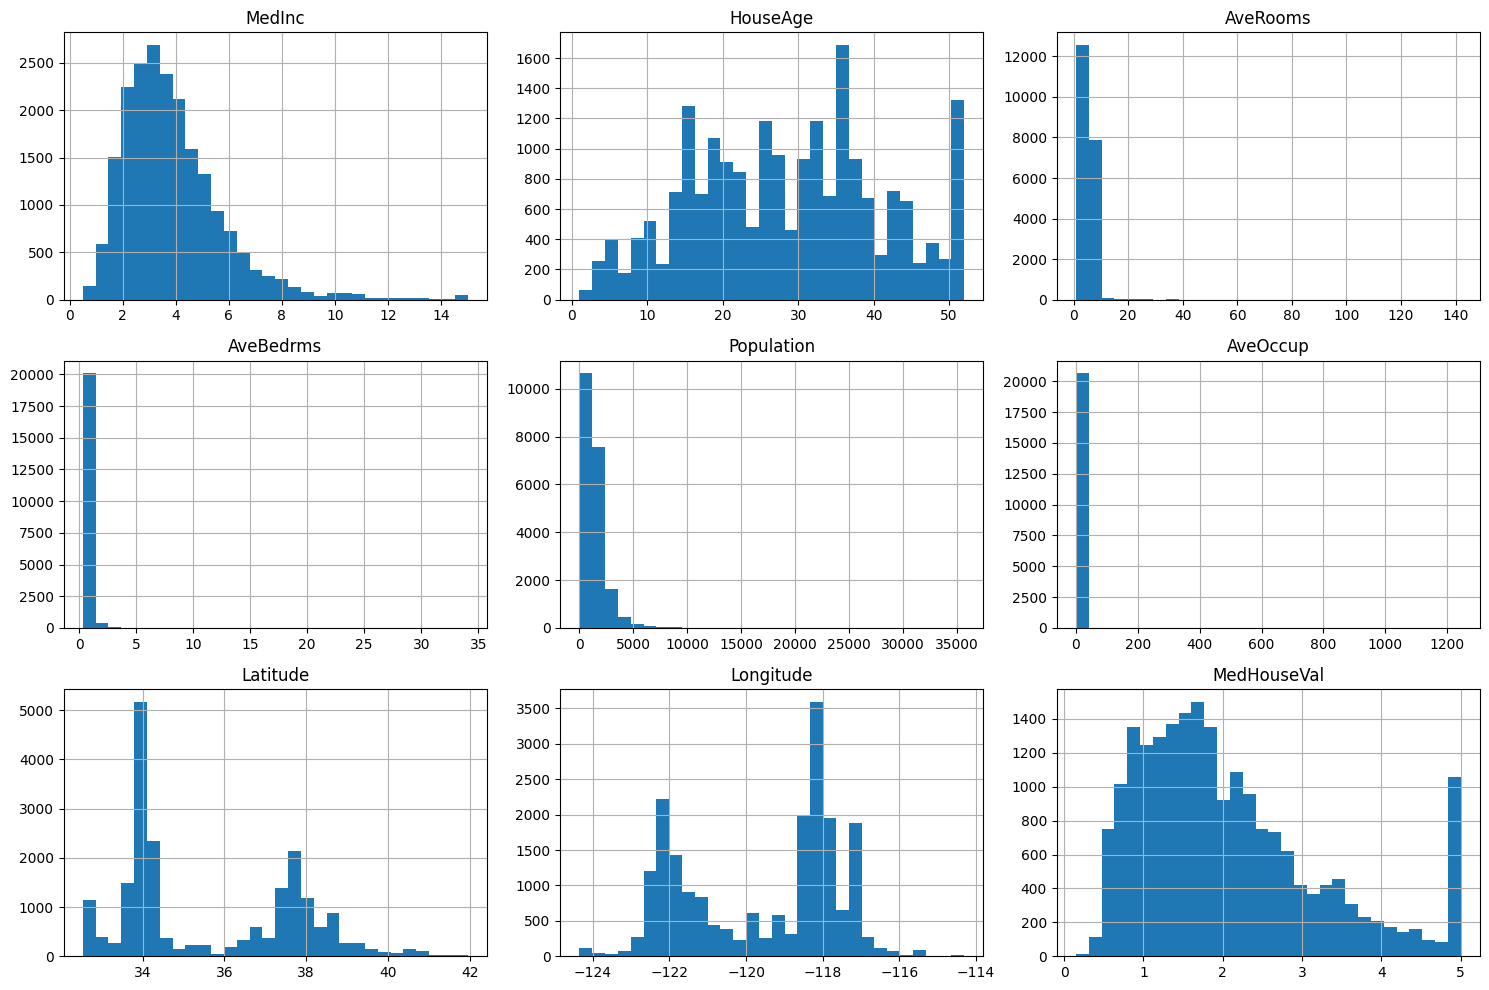

In [70]:
housing_df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

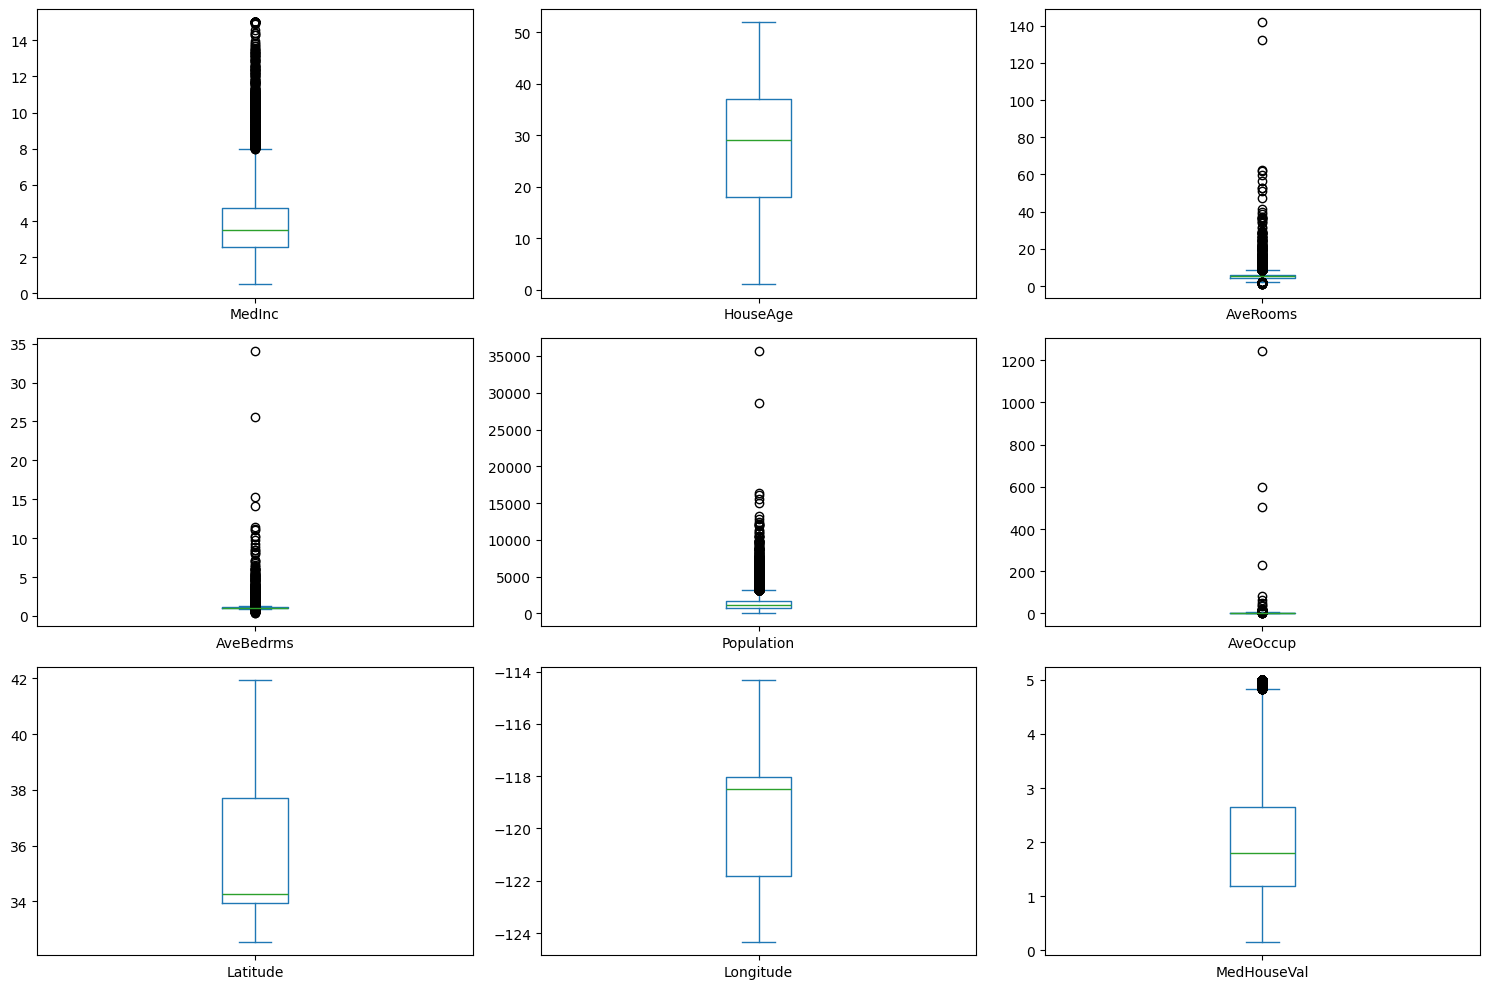

In [71]:
housing_df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10))
plt.tight_layout()
plt.show()

In [72]:
#Your Code Here

## Task 2: Apply your first feature engineering technique

Based on your exploration, apply your first feature engineering technique.

**Example approaches**:
- Transform skewed features using log, sqrt, power, or quantile transformations
- Create bins/categories from continuous variables
- Create interaction features (e.g., rooms per household = total rooms / households)

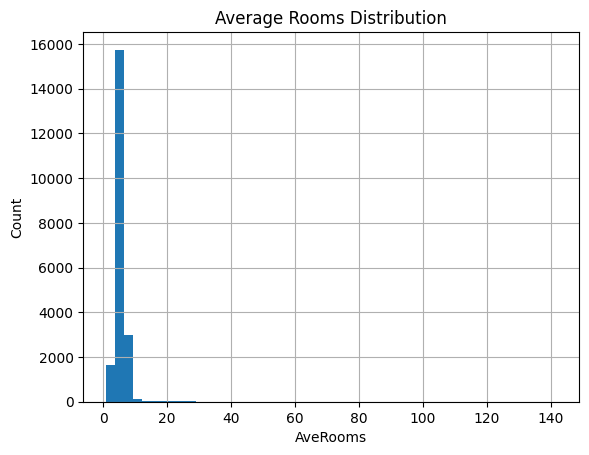

In [73]:
#Have to Delete this cell to complete the code
housing_df['AveRooms'].hist(bins=50)
plt.xlabel('AveRooms'); plt.ylabel('Count'); plt.title('Average Rooms Distribution')
plt.show()


In [74]:
housing_df[housing_df['AveRooms'] > 20][['AveRooms', 'Population', 'AveOccup']].head()


,AveRooms,Population,AveOccup
1024,29.852941,202.0,1.980392
1102,31.777778,47.0,1.740741
1234,28.757282,252.0,2.446602
1238,28.112903,298.0,2.403226
1239,33.989691,267.0,2.752577


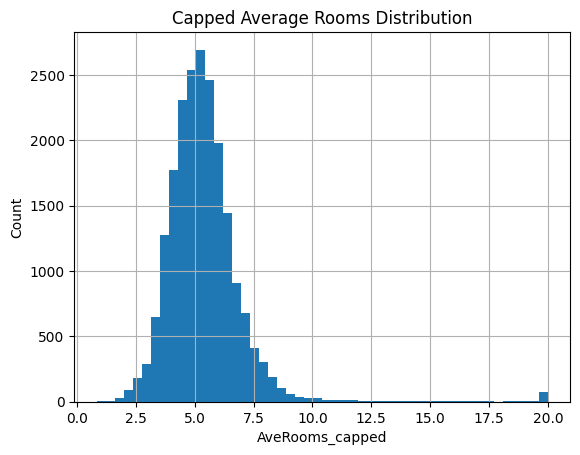

In [75]:
housing_df['AveRooms_capped'] = housing_df['AveRooms'].clip(upper=20)

plt.hist(housing_df['AveRooms_capped'], bins=50)
plt.grid(True)
plt.xlabel('AveRooms_capped')
plt.ylabel('Count')
plt.title('Capped Average Rooms Distribution')
plt.show()


### Utilized Quantile Normal Transformation on Average Rooms Distribution & Checking Differences in Age and Income

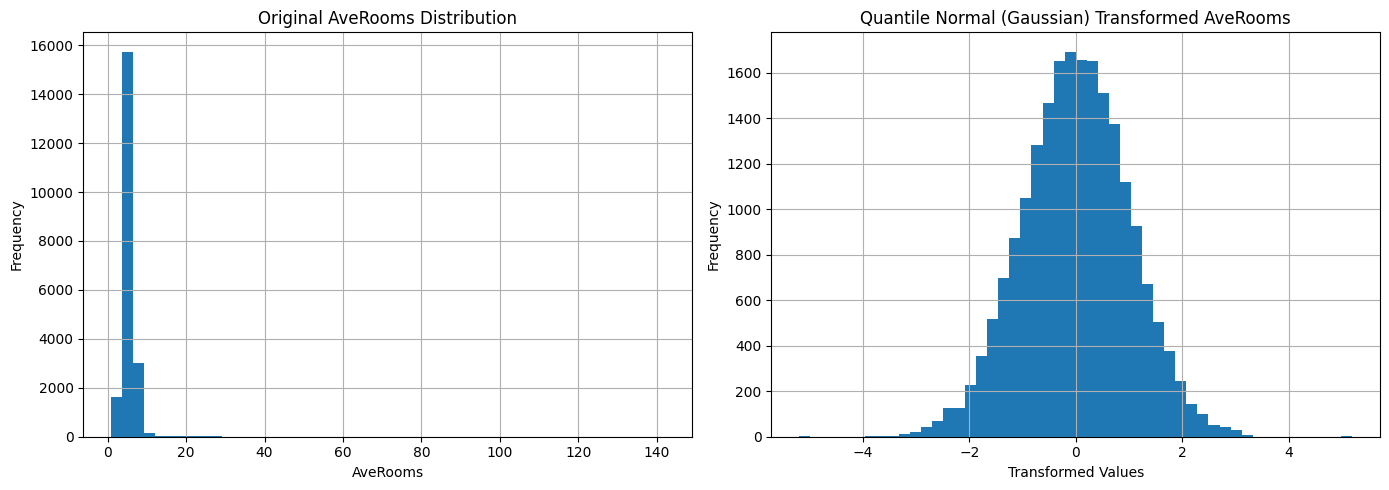

  HouseAge_bin  rooms_per_person  bedrooms_per_room  income_per_room
0          40+          2.732919           0.146591         1.192017
1        21-30          2.956685           0.155797         1.330750
2          40+          2.957661           0.129516         0.875637
3          40+          2.283154           0.184458         0.970046
4          40+          2.879646           0.172096         0.612272


In [76]:
# Quantile Normal Transform
data = housing_df[["AveRooms"]].astype(float)
qt = QuantileTransformer(output_distribution="normal", random_state=42)
housing_df["AveRooms_qnorm"] = qt.fit_transform(data)

# Plotting
plt.figure(figsize=(14, 5))

# Original Distribution
plt.subplot(1, 2, 1)
plt.hist(housing_df["AveRooms"], bins=50)
plt.grid(True)
plt.title("Original AveRooms Distribution")
plt.xlabel("AveRooms")
plt.ylabel("Frequency")

# Transformed Distribution
plt.subplot(1, 2, 2)
plt.hist(housing_df["AveRooms_qnorm"], bins=50)
plt.grid(True)
plt.title("Quantile Normal (Gaussian) Transformed AveRooms")
plt.xlabel("Transformed Values")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# House age bins
housing_df["HouseAge_bin"] = pd.cut(
    housing_df["HouseAge"],
    bins=[0, 10, 20, 30, 40, 60],
    labels=["0-10", "11-20", "21-30", "31-40", "40+"],
    include_lowest=True
)

# rooms per person
housing_df["rooms_per_person"] = housing_df["AveRooms"] / housing_df["AveOccup"]

# bedrooms per room
housing_df["bedrooms_per_room"] = housing_df["AveBedrms"] / housing_df["AveRooms"]

# income per room (luxury measure)
housing_df["income_per_room"] = housing_df["MedInc"] / housing_df["AveRooms"]

print(housing_df[["HouseAge_bin", "rooms_per_person",
          "bedrooms_per_room", "income_per_room"]].head())


#### Noticed the difference after skewing the messing with the plot and understood Quantile Transformation with Gaussian
#### Many Older houses 

## Task 3: Apply your second feature engineering technique

**Example approaches**:
- Scale features to similar ranges
- Encode any categorical variables you created
- Create aggregate statistics by groups

### Checking on the MedInc and HouseAge

In [77]:
housing_df["MedInc_bin"] = pd.qcut(
    housing_df["MedInc"], q=4,
    labels=["low", "mid_low", "mid_high", "high"]
)

housing_df["HouseAge_bin"] = pd.cut(
    housing_df["HouseAge"],
    bins=[0, 10, 20, 30, 40, 60],
    labels=["0-10", "11-20", "21-30", "31-40", "40+"],
    include_lowest=True
)

housing_df["rooms_per_person"] = housing_df["AveRooms"] / housing_df["AveOccup"]
housing_df["bedrooms_per_room"] = housing_df["AveBedrms"] / housing_df["AveRooms"]
housing_df["income_per_room"] = housing_df["MedInc"] / housing_df["AveRooms"]

housing_df[[
    "HouseAge_bin", "MedInc_bin", "MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population",
    "AveOccup", 
    "rooms_per_person", "bedrooms_per_room", "income_per_room"
]].head()

,HouseAge_bin,MedInc_bin,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,rooms_per_person,bedrooms_per_room,income_per_room
0,40+,high,8.3252,41.0,6.984127,1.023810,322.0,2.555556,2.732919,0.146591,1.192017
1,21-30,high,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,2.956685,0.155797,1.330750
2,40+,high,7.2574,52.0,8.288136,1.073446,496.0,2.802260,2.957661,0.129516,0.875637
3,40+,high,5.6431,52.0,5.817352,1.073059,558.0,2.547945,2.283154,0.184458,0.970046
4,40+,mid_high,3.8462,52.0,6.281853,1.081081,565.0,2.181467,2.879646,0.172096,0.612272


## (Optional) Additional feature engineering

Add more techniques if you'd like to experiment further.

In [78]:
# YOUR CODE HERE (optional)


## Model evaluation

Now we'll compare model performance on the original dataset versus your engineered dataset.

### Evaluate datasets

In [79]:
# Save a copy of the engineered dataframe
housing_df.to_csv('housing_df.csv', index=False)

In [80]:
# Create linear regression model
model = LinearRegression()

# Evaluate on original dataset
scores_original = cross_val_score(
    model,
    original_housing_df.drop('MedHouseVal', axis=1),
    original_housing_df['MedHouseVal'],
    cv=10,
    scoring='r2'
)

# Evaluate on engineered dataset
scores_engineered = cross_val_score(
    model,
    housing_df.drop('MedHouseVal', axis=1),
    housing_df['MedHouseVal'],
    cv=10,
    scoring='r2'
)

engineered_mean = scores_engineered.mean()
original_mean = scores_original.mean()
mean_improvement = (engineered_mean - original_mean) / original_mean

print(f'\nMean improvement: {mean_improvement:.2f}%')

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\linear_model\_base.py", line 639, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\linear_model\_base.py", line 167, in _preprocess_data
    X = check_array(
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: '31-40'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\linear_model\_base.py", line 639, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\linear_model\_base.py", line 167, in _preprocess_data
    X = check_array(
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "d:\VSCodePrograms\Class_Workspace\Lesson_16\.venv\lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: '40+'


### Visualize model performance comparison

In [ ]:
original_model = LinearRegression()
original_model.fit(original_housing_df.drop('MedHouseVal', axis=1), original_housing_df['MedHouseVal'])
original_predictions = original_model.predict(original_housing_df.drop('MedHouseVal', axis=1))

model = LinearRegression()
model.fit(housing_df.drop('MedHouseVal', axis=1), housing_df['MedHouseVal'])
predictions = model.predict(housing_df.drop('MedHouseVal', axis=1))

# Create boxplot comparing performance
data_to_plot = [scores_original, scores_engineered]
labels = ['Original', 'Engineered']

fig, axs = plt.subplots(1, 2, figsize=(9,4.5))

fig.suptitle(f'Model performance comparison\nmean improvement: {mean_improvement:.2f}%')

axs[0].set_title('Cross validation R² scores')
axs[0].boxplot(data_to_plot, tick_labels=labels)
axs[0].set_xlabel('Dataset')
axs[0].set_ylabel('R² score')

axs[1].set_title('Predictions vs true values')
axs[1].plot(
    original_housing_df['MedHouseVal'], original_predictions,
    'o', markersize=1, label='Original', alpha=0.25
)

axs[1].plot(
    housing_df['MedHouseVal'], predictions,
    'o', markersize=1, label='Engineered', alpha=0.25
)

axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predictions')

leg = axs[1].legend(loc='upper left', markerscale=8, framealpha=1)

for lh in leg.legend_handles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.show()

## 3. Reflection

**Questions to consider**:

1. Which feature engineering techniques had the biggest impact on model performance?
2. Did adding more features always improve performance, or did some hurt it?
3. How might you further improve the engineered dataset?
4. What trade-offs did you consider (e.g., interpretability vs performance, complexity vs gains)?

**Your reflection**:

*Write your thoughts here...*